# Sales and Profit Analysis Project

importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [3]:
data = pd.read_csv("data/Sales&ProfitData.csv")

creating a copy of the dataset for further analysis

In [4]:
df = data.copy()

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,5/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,17-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,28-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,5/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [7]:
df.shape

(51290, 24)

51290 rows !! 

## Basic Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


checking for duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

### Checking for Nan Values

In [16]:
df.isna().sum().sum()

np.int64(41296)

Postal Code Column has a lot of Nan Values

In [17]:
df['Postal Code'].isna().sum()

np.int64(41296)

Checking Data Types

In [20]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

#### Seperating data on the data type 

In [21]:
float_type = df[['Postal Code','Sales','Discount','Profit','Shipping Cost']]
float_type.head()

,Postal Code,Sales,Discount,Profit,Shipping Cost
0,10024.0,2309.650,0.0,762.1845,933.57
1,NaN,3709.395,0.1,-288.7650,923.63
2,NaN,5175.171,0.1,919.9710,915.49
3,NaN,2892.510,0.1,-96.5400,910.16
4,NaN,2832.960,0.0,311.5200,903.04


In [22]:
else_type = df[['Row ID','Order ID','Ship Mode','Customer ID','Customer Name','Segment','City','State','Country']]
else_type.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country
0,32298,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States
1,26341,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia
2,25330,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia
3,13524,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany
4,47221,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal


In [23]:
date_type = df[['Ship Date', "Order Date"]]
date_type.head()

,Ship Date,Order Date
0,31-07-2012,31-07-2012
1,5/2/2013,2/5/2013
2,17-10-2013,17-10-2013
3,28-01-2013,28-01-2013
4,5/11/2013,11/5/2013


### Changing Dates Columns to Datetime object

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = 'mixed')

Checking

In [26]:
df[['Order Date', "Ship Date"]].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [28]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1430
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [29]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

### Setting up relevant columns into Categorical Data


In [31]:
df[['Segment','Ship Mode','Country','Market','Region','Category','Sub-Category','Order Priority']] = df[['Segment','Ship Mode','Country','Market','Region','Category','Sub-Category','Order Priority']].astype("category")

Checking

In [32]:
df[['Segment','Ship Mode','Country','Market','Region','Category','Sub-Category','Order Priority']].dtypes

Segment           category
Ship Mode         category
Country           category
Market            category
Region            category
Category          category
Sub-Category      category
Order Priority    category
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

# Data Cleaning 

In [34]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.isnull().sum().sum()

np.int64(41296)

Handling Postal Code Missing Values

In [40]:
postal_code_mode = df['Postal Code'].mode()[0]
# filling missing values with the mode

df['Postal Code'] = df['Postal Code'].fillna(postal_code_mode)
df['Postal Code'].head()

0    10024.0
1    10035.0
2    10035.0
3    10035.0
4    10035.0
Name: Postal Code, dtype: float64

Checking

In [42]:
df['Postal Code'].isna().sum()
df['Postal Code'].isnull().sum()

np.int64(0)

Pretty sorted for further analysis

## Negative Sales

In [44]:
positive_sales = df['Sales'] >= 0 
negative_sales = df[df['Sales'] < 0]

#### Check for negaitve values in Profit Column

In [46]:
negative_profit = df[df['Profit'] < 0]
if not negative_profit.empty:
    print("Negative Values in 'Profit':")
    display(negative_profit.head())


Negative Values in 'Profit':


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,26341,IN-2013-77878,2013-02-05,2013-05-02,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
3,13524,ES-2013-1579342,2013-01-28,2013-01-28,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
9,40936,CA-2012-116638,2012-01-28,2012-01-28,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical
30,220,US-2011-128776,2011-12-28,2011-12-28,Second Class,RR-19525,Rick Reed,Corporate,Santo Domingo,Santo Domingo,...,TEC-PH-10002815,Technology,Phones,"Samsung Smart Phone, VoIP",1696.640,5,0.2,-148.4600,704.06,Critical
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.42,High


Finding Mean Profit form the Sales

In [53]:
mean_profit = df[df['Profit'] >= 0]["Profit"].mean()
mean_profit = mean_profit.round(2)

In [54]:
data.loc[data['Profit'] < 0, 'Profit'] = mean_profit
mean_profit

np.float64(61.63)

Replacing negative values in profit column with the mean of non negative profits

In [55]:
df['Profit'] = df['Profit'].apply(lambda x: mean_profit if x < 0 else x)
print("Negative Profits (Loss) replaced with the mean of Positive Profits")
print(df["Profit"].head())

Negative Profits (Loss) replaced with the mean of Positive Profits
0    762.1845
1     61.6300
2    919.9710
3     61.6300
4    311.5200
Name: Profit, dtype: float64


Setting up Segment Data for final analysis 

In [57]:
segment_data = df[['Customer ID', "Customer Name", 'Category', "Product Name", 'Sub-Category','Sales',"Profit",'Quantity', 'Discount',"Order Date",'City',"State","Region","Market","Order Priority"]]
segment_data.head()

,Customer ID,Customer Name,Category,Product Name,Sub-Category,Sales,Profit,Quantity,Discount,Order Date,City,State,Region,Market,Order Priority
0,RH-19495,Rick Hansen,Technology,Plantronics CS510 - Over-the-Head monaural Wir...,Accessories,2309.650,762.1845,7,0.0,2012-07-31,New York City,New York,East,US,Critical
1,JR-16210,Justin Ritter,Furniture,"Novimex Executive Leather Armchair, Black",Chairs,3709.395,61.6300,9,0.1,2013-02-05,Wollongong,New South Wales,Oceania,APAC,Critical
2,CR-12730,Craig Reiter,Technology,"Nokia Smart Phone, with Caller ID",Phones,5175.171,919.9710,9,0.1,2013-10-17,Brisbane,Queensland,Oceania,APAC,Medium
3,KM-16375,Katherine Murray,Technology,"Motorola Smart Phone, Cordless",Phones,2892.510,61.6300,5,0.1,2013-01-28,Berlin,Berlin,Central,EU,Medium
4,RH-9495,Rick Hansen,Technology,"Sharp Wireless Fax, High-Speed",Copiers,2832.960,311.5200,8,0.0,2013-11-05,Dakar,Dakar,Africa,Africa,Critical


## Sales and Profit Analysis

- Trend of Sales Over time
- Most Profitable Reqions, Cities and Markets
- Most Popular Products
- Sales and Profit Distribution Across Diferent Markets

In [62]:
segment_data.loc[:, "Order Date"] = pd.to_datetime(segment_data['Order Date'])
segment_data.loc[:, "Year"] = segment_data['Order Date'].dt.year
sales_profit_trend = segment_data.groupby("Year")[['Sales', "Profit"]].sum()
sales_profit_trend

,Sales,Profit
Year,,
2011,2.259451e+06,5.551908e+05
2012,2.677439e+06,6.684807e+05
2013,3.405746e+06,8.575773e+05
2014,4.299866e+06,1.079941e+06


### Visualizing through Graphs and Plots

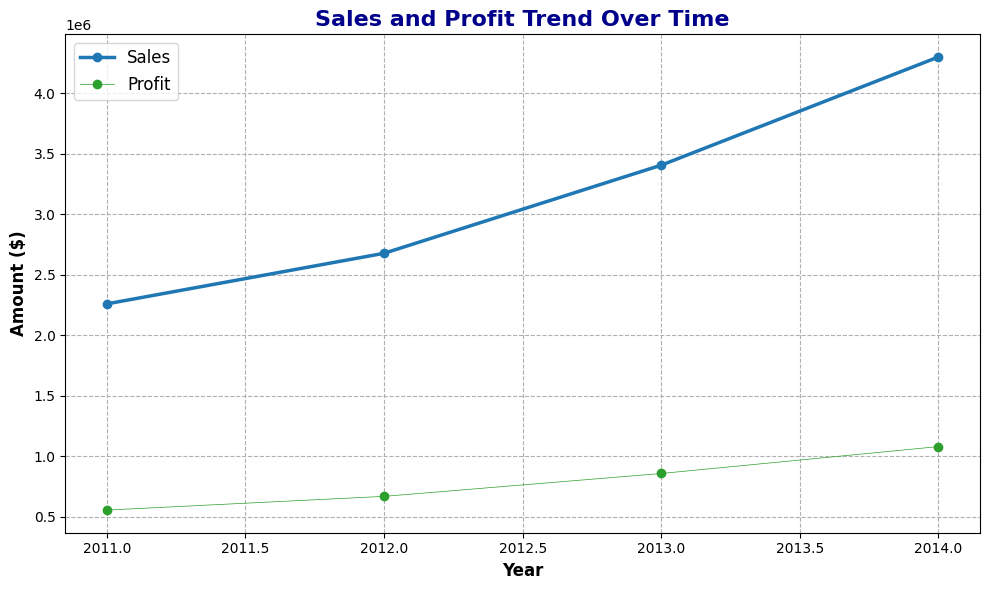

In [72]:
plt.figure(figsize=(10,6))
plt.plot(sales_profit_trend['Sales'], label='Sales',color= '#1f77b4',linewidth=2.5,marker='o')
plt.plot(sales_profit_trend['Profit'], label = "Profit",color= '#2ca02c',linewidth= .5,marker='o')
plt.title("Sales and Profit Trend Over Time", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Amount ($)", fontsize=12,fontweight='bold')
plt.grid(True, linestyle='--')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()
plt.show()

### Crux:

Sales (blue) and Profit (green) have a upward trend over the years. Overall the Business Performance is good.

### Which region and Market contribute to most sales and profit

In [75]:
region_market_sales_profit = segment_data.groupby(['Region',"Market"], observed=False)[["Sales","Profit"]].sum()

top_region_sales = region_market_sales_profit.sort_values(by="Sales" , ascending=False)
top_market_sales = region_market_sales_profit.sort_values(by='Profit', ascending=False)

In [83]:
print("Top Regions by Sales :")
top_region_sales[["Sales"]].round(1).head(10)

Top Regions by Sales :


,,Sales
Region,Market,
Central,EU,1720552.6
Oceania,APAC,1100184.6
Southeast Asia,APAC,884423.2
North Asia,APAC,848309.8
EMEA,EMEA,806161.3
Africa,Africa,783773.2
Central Asia,APAC,752826.6
West,US,725457.8
East,US,678781.2


In [84]:
print("\nTop Markets by Profits:")
top_market_sales[['Profit']].round(2).head()


Top Markets by Profits:


,,Profit
Region,Market,
Central,EU,380665.07
EMEA,EMEA,265941.66
Oceania,APAC,241328.47
Africa,Africa,241225.56
Southeast Asia,APAC,210122.90


### Creating Subplots

In [85]:
top_region_sales = region_market_sales_profit.sort_values(by="Sales" , ascending=False).head()
top_markets_profits = region_market_sales_profit.sort_values(by="Profit", ascending=False).head()

## Top Regions and Markets 

by sales and Profit

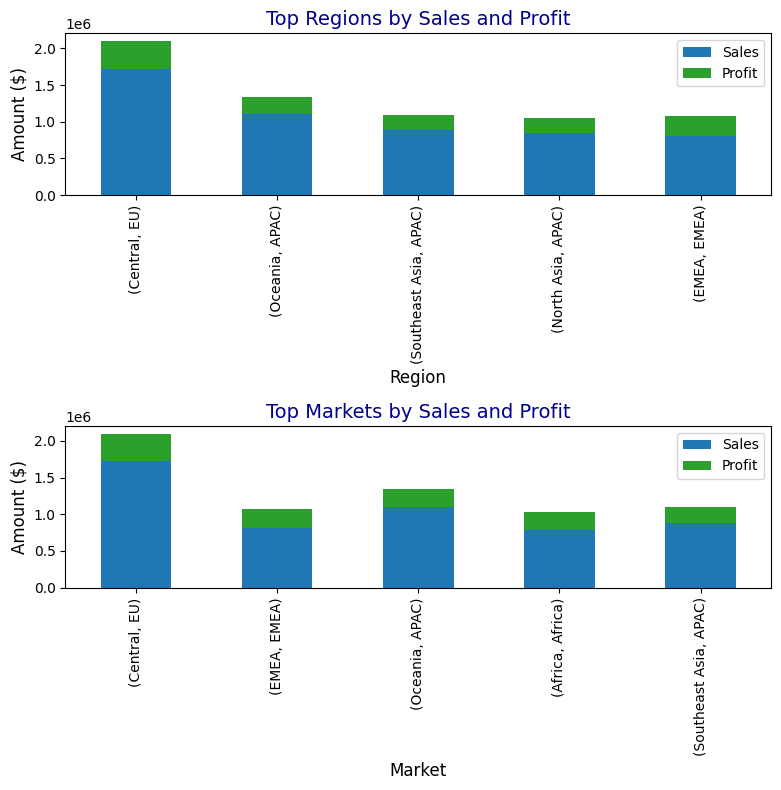

In [97]:
fig, ax = plt.subplots(2,1, figsize= (8,8))

#sales plotting ( by region)
top_region_sales[['Sales', 'Profit']].plot(kind='bar',stacked=True,ax=ax[0],color=['#1f77b4', '#2ca02c'])
ax[0].set_title('Top Regions by Sales and Profit', fontsize=14, color='darkblue')
ax[0].set_ylabel('Amount ($)', fontsize=12)
ax[0].set_xlabel('Region', fontsize=12)

# plotting stakced bar chart
top_markets_profits[['Sales', 'Profit']].plot(kind='bar',stacked=True,ax=ax[1],color=['#1f77b4', '#2ca02c'])
ax[1].set_title('Top Markets by Sales and Profit', fontsize=14, color='darkblue')
ax[1].set_ylabel('Amount ($)', fontsize=12)
ax[1].set_xlabel('Market', fontsize=12)

plt.tight_layout()
plt.show()


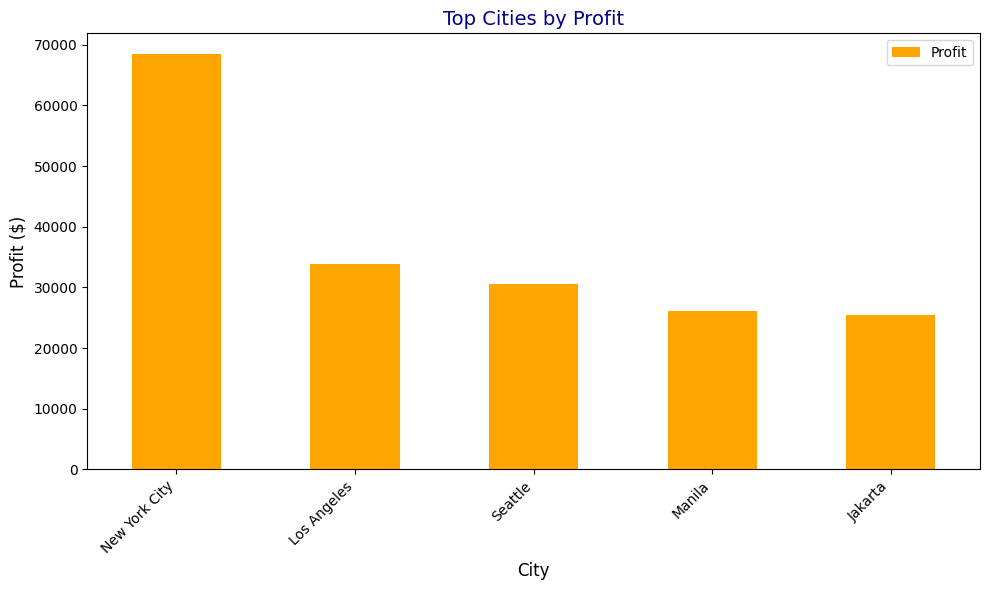

In [ ]:
# Group data by City and State, summing the Profit
city_state_profit = segment_data.groupby(['City', 'State'])['Profit'].sum().reset_index()

# Sort the data for top cities and states by Profit
top_city_state_profit = city_state_profit.sort_values(by='Profit', ascending=False).head()

# Display top profitable cities and states
top_city_state_profit

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Profit by City and State (Bar Chart)
top_city_state_profit.plot(kind='bar', x='City',y='Profit', ax=ax, color='orange')


## Rotating the x sticks:
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the title and labels
ax.set_title('Top Cities by Profit', fontsize=14, color='darkblue')
ax.set_ylabel('Profit ($)', fontsize=12)
ax.set_xlabel('City', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Most Popular Products

based on quantity sold

In [98]:
# Grouping the data by Product Name and summing the Quantity
product_quantity = segment_data.groupby('Product Name')['Quantity'].sum().reset_index()
top_products = product_quantity.sort_values(by='Quantity', ascending=False).head()
top_products


,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259


### Plotting through Pie Chart

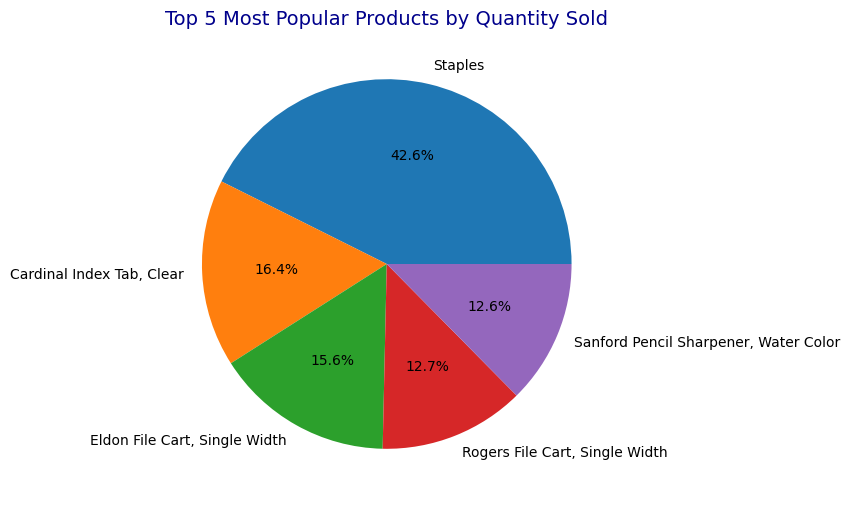

In [ ]:
top_products = product_quantity.sort_values(by='Quantity', ascending=False).head()
# pie 
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(top_products['Quantity'],labels=top_products['Product Name'],autopct='%1.1f%%',colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
#title
ax.set_title('Top 5 Most Popular Products by Quantity Sold', fontsize=14, color='darkblue')

plt.show()


In [99]:

market_sales_profit = segment_data.groupby('Market', observed=False)[['Sales', 'Profit']].sum().reset_index()

market_sales_profit


,Market,Sales,Profit
0,APAC,3.585744e+06,835078.0434
1,Africa,7.837732e+05,241225.5640
2,Canada,6.692817e+04,17817.3900
3,EMEA,8.061613e+05,265941.6640
4,EU,2.938089e+06,689551.0770
5,LATAM,2.164605e+06,553738.3912
6,US,2.297201e+06,557838.0374


### Distribution of Sales and Profit across MArkets

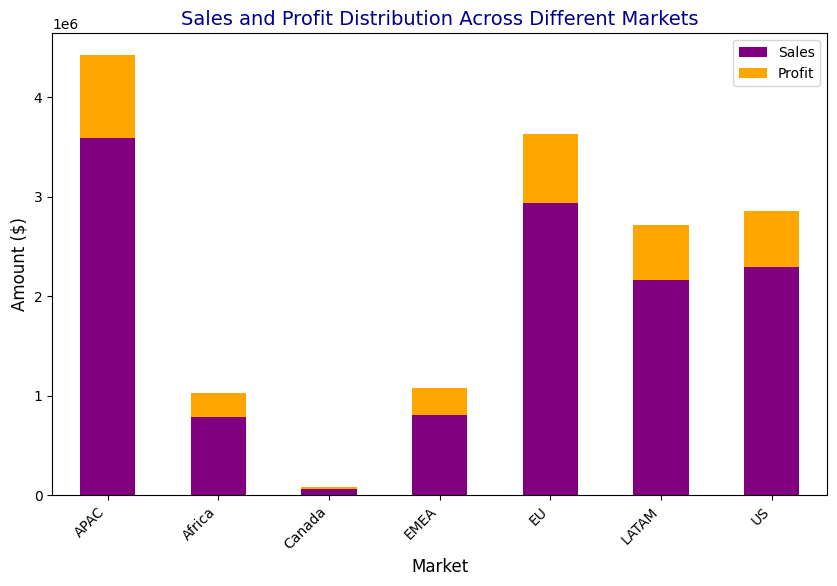

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))

## sales and profit for each market

market_sales_profit.set_index('Market')[['Sales', 'Profit']].plot(kind='bar',stacked=True,ax=ax,color=['purple','orange'])

## title , labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Sales and Profit Distribution Across Different Markets', fontsize=14, color='darkblue')
ax.set_ylabel('Amount ($)', fontsize=12)
ax.set_xlabel('Market', fontsize=12)

plt.show()


# Sales & Profit Analysis - Key Points

### Top-Selling Products:

* Staples were the clear favorite, with 876 units sold.
* Cardinal Index Tabs followed, with 337 units sold.
* Eldon File Carts rounded out the top 3 with 321 units.
* Office essentials drive the highest sales volume.

### Market Performance Insights:

* Different regions exhibit varying revenue-to-profit patterns.
* Some markets generate high sales but lower profits.
* Identifies opportunities for better cost control
* Reveals pricing strategy improvements needed
* Stacked bar charts highlight which markets need attention.

### Key Takeaway
* There is need to focus on office staples for volume, optimize pricing/costs in underperforming markets.